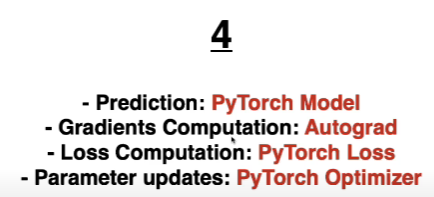

1. Design model (input, output, forward pass with different layers)
2. Construct loss and optimizer
3. Training loop
    - Forward = compute prediction and loss
    - Backward = compute gradients
    - Update weights

In [10]:
import torch
import torch.nn as nn


In [11]:
# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')

#samples: 4, #features: 1


In [12]:
# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

In [13]:
# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features
output_size = n_features

In [14]:
# we can call this model with samples X
model = nn.Linear(input_size, output_size)

In [15]:
'''
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)
'''

'\nclass LinearRegression(nn.Module):\n    def __init__(self, input_dim, output_dim):\n        super(LinearRegression, self).__init__()\n        # define diferent layers\n        self.lin = nn.Linear(input_dim, output_dim)\n\n    def forward(self, x):\n        return self.lin(x)\n\nmodel = LinearRegression(input_size, output_size)\n'

In [16]:
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = 0.190


In [17]:
# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 2000

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [20]:
# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        # print(w) # w is a list of list
        # Example output: 
        # Parameter containing:
        # tensor([[2.0000]], requires_grad=True)
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

epoch  1 : w =  1.9999977350234985  loss =  tensor(6.0254e-12, grad_fn=<MseLossBackward0>)
epoch  11 : w =  1.9999977350234985  loss =  tensor(6.0254e-12, grad_fn=<MseLossBackward0>)
epoch  21 : w =  1.9999977350234985  loss =  tensor(6.0254e-12, grad_fn=<MseLossBackward0>)
epoch  31 : w =  1.9999977350234985  loss =  tensor(6.0254e-12, grad_fn=<MseLossBackward0>)
epoch  41 : w =  1.9999977350234985  loss =  tensor(6.0254e-12, grad_fn=<MseLossBackward0>)
epoch  51 : w =  1.9999977350234985  loss =  tensor(6.0254e-12, grad_fn=<MseLossBackward0>)
epoch  61 : w =  1.9999977350234985  loss =  tensor(6.0254e-12, grad_fn=<MseLossBackward0>)
epoch  71 : w =  1.9999977350234985  loss =  tensor(6.0254e-12, grad_fn=<MseLossBackward0>)
epoch  81 : w =  1.9999977350234985  loss =  tensor(6.0254e-12, grad_fn=<MseLossBackward0>)
epoch  91 : w =  1.9999977350234985  loss =  tensor(6.0254e-12, grad_fn=<MseLossBackward0>)
epoch  101 : w =  1.9999977350234985  loss =  tensor(6.0254e-12, grad_fn=<MseLoss